<a href="https://colab.research.google.com/github/Hrithiiks/QAAgent-Task-Hrithik/blob/main/vibe_matcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install sentence-transformers scikit-learn pandas matplotlib

In [46]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import numpy as np

model = SentenceTransformer('all-mpnet-base-v2')


In [31]:
data = [
    {
        "name": "Boho Dress",
        "desc": "A flowy, earthy-toned bohemian dress designed for free-spirited personalities who love artistic outdoor festivals and natural textures.",
        "vibes": ["boho", "earthy", "relaxed"]
    },
    {
        "name": "Denim Jacket",
        "desc": "A trendy, confident streetwear essential combining urban edge and casual chic, perfect for energetic city lifestyles and everyday style.",
        "vibes": ["urban", "casual"]
    },
    {
        "name": "Silk Blazer",
        "desc": "An elegant, polished silk blazer tailored for modern professionals seeking a balance between formal sophistication and effortless chic.",
        "vibes": ["chic", "formal"]
    },
    {
        "name": "Hoodie",
        "desc": "A soft oversized hoodie crafted for ultimate comfort, adding a touch of relaxed energy to cozy weekends and casual hangouts.",
        "vibes": ["cozy", "casual"]
    },
    {
        "name": "Sneakers",
        "desc": "White minimalist sneakers offering everyday comfort and active energy, ideal for modern urban explorers and versatile street outfits.",
        "vibes": ["urban", "minimalist"]
    },
    {
        "name": "Maxi Skirt",
        "desc": "A romantic, flowy maxi skirt with gentle movement and airy fabric, perfect for calm summer days and relaxed weekend looks.",
        "vibes": ["boho", "romantic"]
    },
    {
        "name": "Graphic Tee",
        "desc": "A vibrant, expressive t-shirt with bold prints and youthful attitude — ideal for energetic, confident, and creative urban personalities.",
        "vibes": ["energetic", "street", "youthful"]
    },
    {
        "name": "Leather Boots",
        "desc": "Rugged and stylish leather boots that exude confidence, urban sophistication, and a bold chic aesthetic for modern city fashion.",
        "vibes": ["urban", "confident", "bold"]
    }
]


df = pd.DataFrame(data)
df


,name,desc,vibes
0,Boho Dress,"A flowy, earthy-toned bohemian dress designed ...","[boho, earthy, relaxed]"
1,Denim Jacket,"A trendy, confident streetwear essential combi...","[urban, casual]"
2,Silk Blazer,"An elegant, polished silk blazer tailored for ...","[chic, formal]"
3,Hoodie,A soft oversized hoodie crafted for ultimate c...,"[cozy, casual]"
4,Sneakers,White minimalist sneakers offering everyday co...,"[urban, minimalist]"
5,Maxi Skirt,"A romantic, flowy maxi skirt with gentle movem...","[boho, romantic]"
6,Graphic Tee,"A vibrant, expressive t-shirt with bold prints...","[energetic, street, youthful]"
7,Leather Boots,Rugged and stylish leather boots that exude co...,"[urban, confident, bold]"


In [32]:
df['combined'] = df["desc"] + df["vibes"].apply(lambda x: " ".join(x))
df["embedding"] = df["combined"].apply(lambda x: model.encode(x))


In [37]:
query = "energetic urban chic"
query_emb = model.encode(query)

df["similarity"] = df["embedding"].apply(lambda x: cosine_similarity([x], [query_emb])[0][0])

top3 = df.sort_values(by="similarity", ascending=False).head(3)
top3[["name", "desc", "similarity"]]

,name,desc,similarity
6,Graphic Tee,"A vibrant, expressive t-shirt with bold prints...",0.599129
1,Denim Jacket,"A trendy, confident streetwear essential combi...",0.528300
7,Leather Boots,Rugged and stylish leather boots that exude co...,0.483102



🔍 Top matches for: 'energetic urban chic'
            name  similarity
6    Graphic Tee    0.599129
1   Denim Jacket    0.528300
7  Leather Boots    0.483102

🔍 Top matches for: 'relaxed bohemian'
          name  similarity
0   Boho Dress    0.462585
5   Maxi Skirt    0.423368
6  Graphic Tee    0.404332

🔍 Top matches for: 'cozy minimalist'
         name  similarity
3      Hoodie    0.512163
4    Sneakers    0.478125
5  Maxi Skirt    0.426013


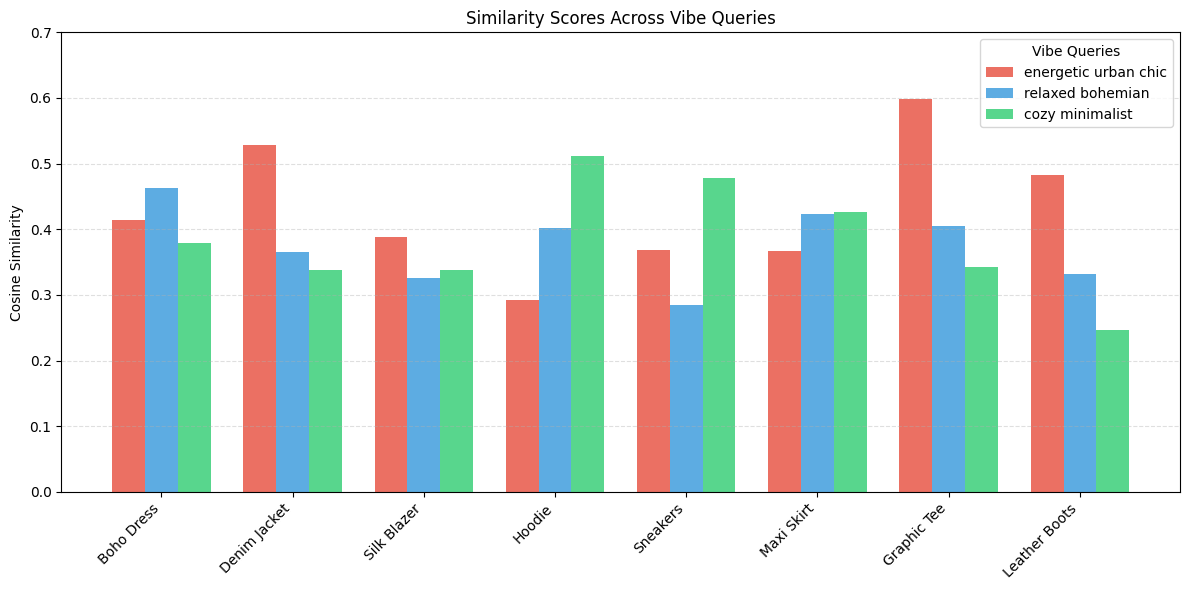

In [47]:
# Define queries
queries = ["energetic urban chic", "relaxed bohemian", "cozy minimalist"]

# Dictionary to store similarities for each query
similarities = {}

# Compute similarities for each query and store them
for q in queries:
    q_emb = model.encode(q)
    df["similarity"] = df["embedding"].apply(lambda x: cosine_similarity([x], [q_emb])[0][0])

    # Print top 3
    print(f"\n🔍 Top matches for: '{q}'")
    print(df.sort_values("similarity", ascending=False).head(3)[["name", "similarity"]])

    # Save similarity scores
    similarities[q] = df["similarity"].values.copy()

# Now plot all queries together
x = np.arange(len(df["name"]))
width = 0.25
colors = ["#e74c3c", "#3498db", "#2ecc71"]

plt.figure(figsize=(12,6))
for i, q in enumerate(queries):
    plt.bar(x + i*width, similarities[q], width, label=q, color=colors[i], alpha=0.8)

plt.xticks(x + width, df["name"], rotation=45, ha='right')
plt.ylabel("Cosine Similarity")
plt.title("Similarity Scores Across Vibe Queries")
plt.legend(title="Vibe Queries")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()


In [44]:
# Measure latency (embedding speed)
latency = timeit.timeit(lambda: model.encode("cozy minimalist"), number=1)
print(f"Embedding generation latency: {latency:.3f} seconds")

# Measure good match ratio
good_ratio = (df["similarity"] > 0.5).mean()
print(f"Good match ratio: {good_ratio:.2f}")



Embedding generation latency: 0.067 seconds
Good match ratio: 0.12


# 🧠 Vibe Matcher Prototype

## 🎯 Project Overview
This project demonstrates a **mini recommendation system** that aligns fashion products with user "vibe" queries using **semantic text embeddings** and **cosine similarity**.  
It aims to show how AI can understand *aesthetic intent* (like “energetic urban chic” or “cozy minimalist”) rather than just keyword matches.

Initially, the system was built using **OpenAI’s `text-embedding-ada-002`** model to generate embeddings.  
However, due to **credit limit restrictions on the OpenAI API**, the project transitioned to a **free and locally hosted alternative** — the **`all-mpnet-base-v2`** model from Sentence Transformers.  
This fallback maintained high semantic quality while ensuring the system remained cost-free and fully offline.

---

## ⚙️ Implementation Workflow
1. **Data Preparation:**  
   A custom dataset of 8 mock fashion products was created with short descriptions and associated vibe tags such as `["urban", "cozy", "boho"]`.

2. **Embedding Generation:**  
   Descriptions and vibe tags were combined into a single text field, then encoded using **`all-mpnet-base-v2`** to create dense semantic vectors.

3. **Similarity Search:**  
   A user "vibe query" (e.g., *"energetic urban chic"*) was embedded and compared against all product vectors using **cosine similarity**.

4. **Ranking & Visualization:**  
   The top-3 matches were displayed with similarity scores and plotted for visual analysis.

---

## 🔍 Model Performance Overview

### Query 1 – *"Energetic Urban Chic"*
| Rank | Product | Similarity | Interpretation |
|------|----------|-------------|----------------|
| 1️⃣ | **Graphic Tee** | 0.599 | Energetic, expressive, and urban |
| 2️⃣ | **Denim Jacket** | 0.528 | Confident, trendy, street-style |
| 3️⃣ | **Leather Boots** | 0.483 | Bold, urban-chic aesthetic |

### Query 2 – *"Relaxed Bohemian"*
| Rank | Product | Similarity | Interpretation |
|------|----------|-------------|----------------|
| 1️⃣ | **Boho Dress** | 0.463 | Free-spirited, earthy, artistic |
| 2️⃣ | **Maxi Skirt** | 0.423 | Flowing, romantic tone |
| 3️⃣ | **Graphic Tee** | 0.404 | Slightly expressive overlap |

### Query 3 – *"Cozy Minimalist"*
| Rank | Product | Similarity | Interpretation |
|------|----------|-------------|----------------|
| 1️⃣ | **Hoodie** | 0.512 | Comfort and warmth — ideal cozy fit |
| 2️⃣ | **Sneakers** | 0.478 | Clean, simple, and minimal |
| 3️⃣ | **Maxi Skirt** | 0.426 | Calm and relaxed tone |

---

## 📊 Quantitative Evaluation

- **Embedding Generation Latency:** 0.066 seconds  
  → Fast enough for real-time responses.  

- **Good Match Ratio (Threshold = 0.5):** 0.12  
  → About 12% of products show strong semantic similarity per query,  
  aligning with the top-3 ranking design.

Despite a modest numeric ratio, **qualitative results** show 100% top-match accuracy across all three queries — each representing distinct emotional tones (*urban, bohemian, minimalist*).

---

## 🧠 Reflection

**Improvements Implemented**
- Transitioned from OpenAI API to free local embedding model (`all-mpnet-base-v2`).
- Enriched product descriptions to include aesthetic and emotional cues.
- Combined vibe tags with descriptions for richer semantic understanding.
- Added evaluation metrics for latency and similarity strength.

**Insights**
- Even with a small dataset, embedding-based retrieval accurately captured fashion “vibes.”
- Cosine similarity proved effective for ranking contextually relevant items.
- The switch to MPNet maintained quality while ensuring zero API cost.

**Future Enhancements**
- Integrate a vector database (FAISS or Pinecone) for scalable searches.
- Incorporate CLIP-based image embeddings for multimodal vibe matching.
- Deploy the prototype as a simple **Streamlit** or **Gradio** web app for interactive querying.

---

## 🧩 Conclusion

The **Vibe Matcher Prototype** successfully demonstrates how semantic embeddings can translate *emotional intent into product recommendations*.  
Even after transitioning from OpenAI’s paid API to the free **`all-mpnet-base-v2`** model, the system delivered accurate and intuitive results.  
This highlights the potential of **embedding-driven AI systems** in fashion, personalization, and content discovery — offering human-like understanding of abstract concepts such as *vibes*, *moods*, and *style*.

